# Looking at target distribution

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('../input/train.csv')
print(train.shape)
train.head()

In [ ]:
train['target'].value_counts(normalize=True) * 100

In [ ]:
test = pd.read_csv('../input/test.csv')
print(test.shape)
test.head()

In [ ]:
train_folds = pd.read_csv('../input/train_folds_stratified.csv')
print(train_folds.shape)
train_folds.groupby('kfold')['target'].value_counts(normalize=True) * 100

In [ ]:
train_folds = pd.read_csv('../input/train_folds_groups.csv')
print(train_folds.shape)
train_folds.groupby('kfold')['target'].value_counts(normalize=True) * 100

# Plots, wide EDA, etc.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
rc('mathtext',**{'default':'regular'})
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-whitegrid')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

In [ ]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

anatom_site_general_challenge_tr = {'oral/genital': 'Полость/Гениталии',
                                    'palms/soles': 'Ладонь/Подошва',
                                    'head/neck': 'Голова/Шея',
                                    'upper extremity': 'Верхняя конечность',
                                    'lower extremity': 'Нижняя конечность',
                                    'torso': 'Туловище'}
train['anatom_site_general_challenge'] = train['anatom_site_general_challenge'].map(anatom_site_general_challenge_tr)
test['anatom_site_general_challenge'] = test['anatom_site_general_challenge'].map(anatom_site_general_challenge_tr)

benign_malignant_tr = {'benign': 'Доброкачественная', 'malignant': 'Злокачественная'}
train['benign_malignant'] = train['benign_malignant'].map(benign_malignant_tr)

In [ ]:
train['target'].value_counts()

In [ ]:
train.groupby('patient_id')['sex'].first().value_counts(), test.groupby('patient_id')['sex'].first().value_counts()

In [ ]:
data = train['anatom_site_general_challenge'].value_counts(normalize=True).sort_values().values
labels = train['anatom_site_general_challenge'].value_counts(normalize=True).sort_values().index

In [ ]:
def stylize_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='off', direction='out', width=1)
    ax.yaxis.set_tick_params(right='off', direction='out', width=1)
    ax.grid(False)

In [ ]:
site_vs_diagnosis = train.groupby(['anatom_site_general_challenge', 'benign_malignant']).count()['patient_id']
site_vs_diagnosis

In [ ]:
site_vs_diagnosis = train.groupby(['anatom_site_general_challenge', 'benign_malignant']).count()['patient_id'].tolist()
labels = train['anatom_site_general_challenge'].value_counts(normalize=True).sort_values().index
benign_data = site_vs_diagnosis[0:12:2]
maglignant_data = site_vs_diagnosis[1:12:2]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize = (8,5))
rects1 = ax.bar(x - width/2, benign_data, width, label=benign_malignant_tr['benign'], color='g')
rects2 = ax.bar(x + width/2, maglignant_data, width, label=benign_malignant_tr['malignant'], color='r')
ax.set_ylabel('Количество изображений родинок пациента')
ax.set_xlabel('Расположение на теле')
ax.set_title('Количество пациентов по типам опухолей и их расположению')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
stylize_axes(ax)
ax.grid(True, axis='y')

fig.tight_layout()
fig.savefig('../plots/patients_target_site.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (8,4))
image_freq_per_patient = train.groupby(['patient_id']).size()
ax.hist(image_freq_per_patient, 
        image_freq_per_patient.nunique(), color='black')
ax.set_title('Количество пациентов с различным количеством изображений родинок')
ax.set_xlabel('Количество изображений родинок')
ax.set_ylabel('Количество пациентов')
ax.set_xticks(range(0, 120, 5))
ax.set_yticks(list(range(0, 100, 10)) + list(range(100, 310, 20)))
ax.set_xlim(0)
stylize_axes(ax)
ax.grid(True, axis='y')
fig.tight_layout()
fig.savefig('../plots/pic_per_pacient.png', dpi=300, bbox_inches='tight', transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))

sns.countplot(train['age_approx'], hue=train['benign_malignant'], palette=['g', 'r'], ax=ax)
stylize_axes(ax)
ax.legend()
ax.set_yticks(list(range(0, 1050, 100)) + list(range(1000, 4600, 200)))
ax.grid(True, axis='y')

ax.set_title('Распределение возраста пациентов в момент снимка родинки')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество изображений')
ax.set_xticklabels([str(x*5) for x in ax.get_xticks()])
fig.tight_layout()
fig.savefig('../plots/age_distr.png', dpi=300, bbox_inches='tight', transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))

width = 0.35

rects = ax.bar(train.groupby(['patient_id'])['age_approx'].nunique().value_counts().index, 
               train.groupby(['patient_id'])['age_approx'].nunique().value_counts().values, color='k')
ax.set_title('Количество разных пятёрок лет, на протяжении которых были сделаны изображения родинок')
ax.set_ylabel('Количество пациентов')
ax.set_xlabel('Количество пятёрок лет')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)
stylize_axes(ax)
fig.tight_layout()
fig.savefig('../plots/nuniq_age_per_patient.png', dpi=300, bbox_inches='tight', transparent=True)

In [ ]:
train.groupby(['patient_id']).size()

In [ ]:
train.groupby(['patient_id']).size().mean()

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.boxplot(train.groupby(['patient_id']).size(), showfliers=False, vert=False)
stylize_axes(ax)

ax.set_title('Диаграмма размаха по пациентам')
ax.set_xlabel('Количество изображений')

ax.set_xlim(0)
ax.set_ylim(0.8, 1.2)
ax.set_xticks(range(0, 55, 5))
ax.set_yticks([])
ax.grid(True, axis='x')

fig.tight_layout()
fig.savefig('../plots/npics_per_patient_boxplot.png', dpi=300, bbox_inches='tight', transparent=True)

# Analyse hold-out predictions

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
rc('mathtext',**{'default':'regular'})
%config InlineBackend.figure_format = 'retina'
# plt.style.use('seaborn-whitegrid')
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')

In [2]:
exps_n = [2, 6, 7]
hold_outs = [pd.read_csv(f'../models/exp_train_0{exp_n}/exp_train_0{exp_n}_hold_out.csv') for exp_n in exps_n]

In [3]:
def stylize_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='off', direction='out', width=1)
    ax.yaxis.set_tick_params(right='off', direction='out', width=1)
    ax.grid(False)

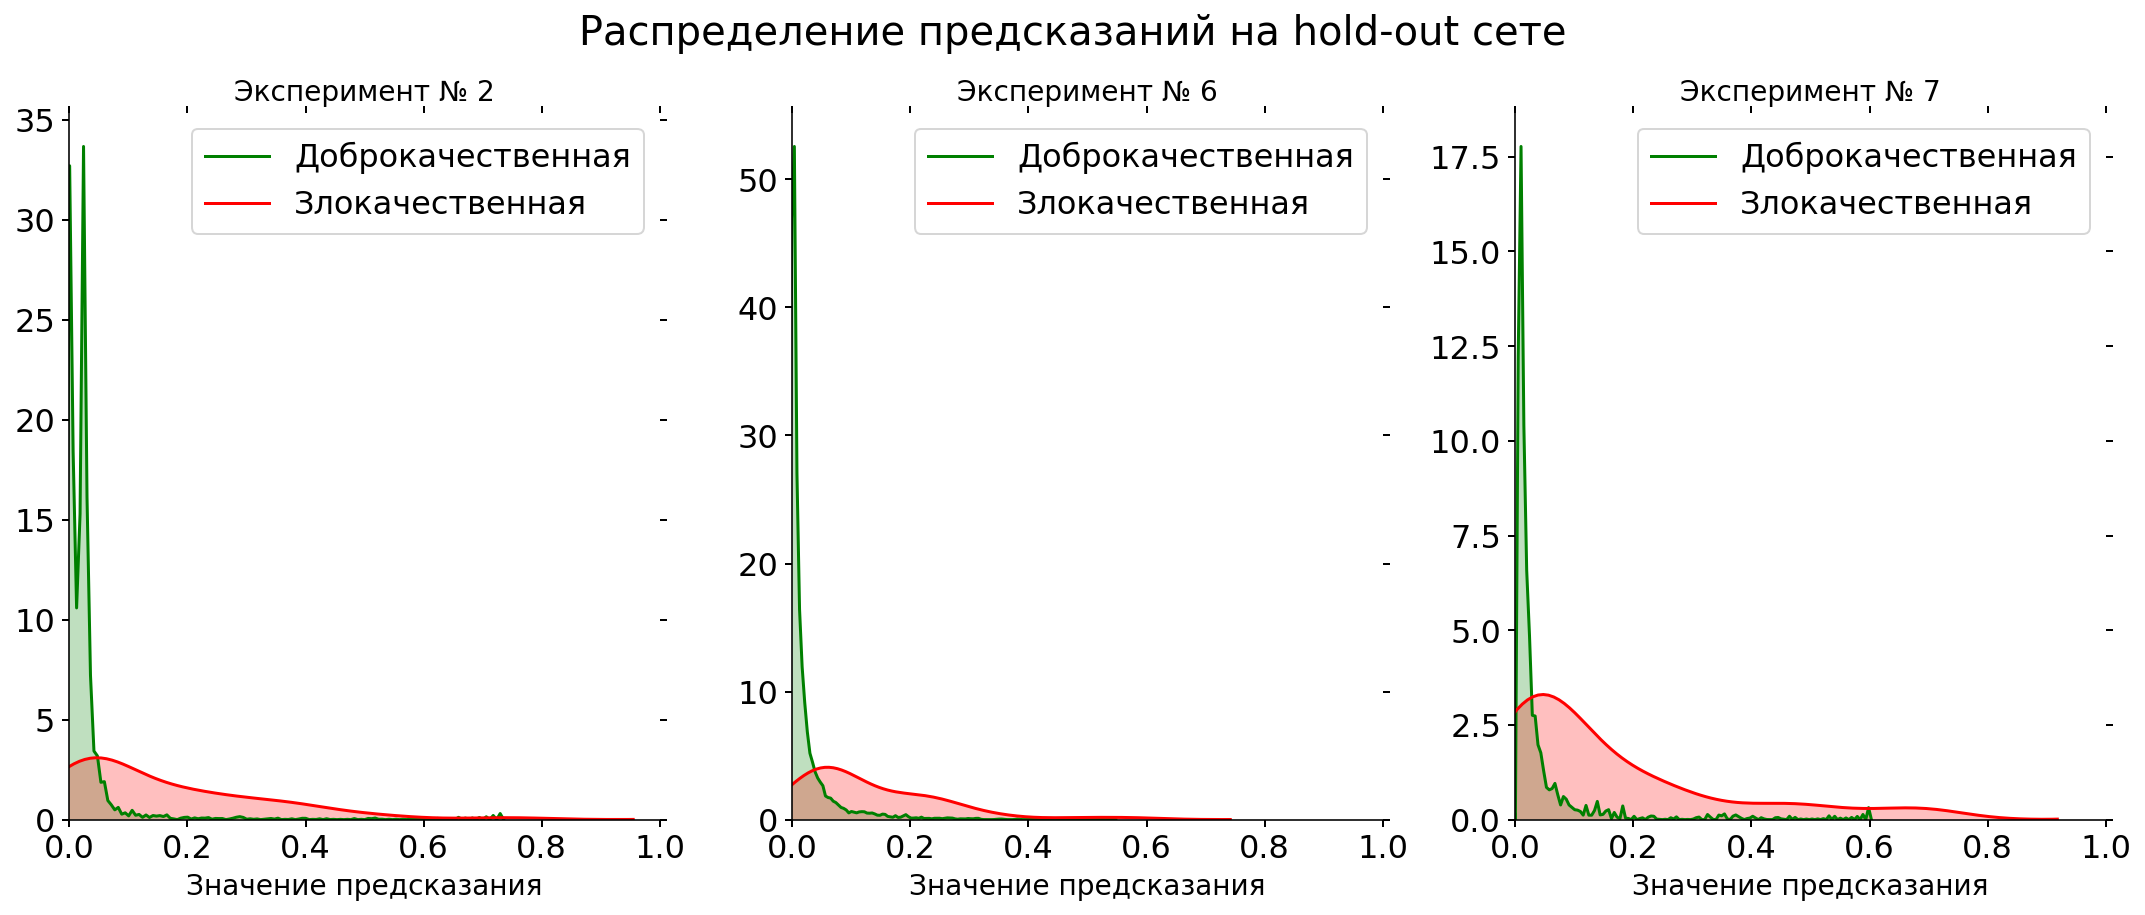

In [40]:
n_cols = 3
fig, axs = plt.subplots(1, n_cols, figsize=(n_cols*5,6))

fig.suptitle('Распределение предсказаний на hold-out сете', y=1.05, fontsize=20)
for i in range(n_cols):
    temp_df = hold_outs[i]
    axs[i].set_title(f'Эксперимент № {exps_n[i]}', fontsize=14)
    sns.kdeplot(temp_df[temp_df['target'] == 0]['prediction'], shade=True, 
                label='Доброкачественная', color='g', ax=axs[i])
    sns.kdeplot(temp_df[temp_df['target'] == 1]['prediction'], shade=True, 
                label='Злокачественная', color='r', ax=axs[i])
    axs[i].set_xlim(0, 1)
    axs[i].set_xlabel('Значение предсказания', fontsize=14)
    stylize_axes(axs[i])
    axs[i].legend(prop={'size': 16})
    axs[i].tick_params(axis='both', which='major', labelsize=16)

fig.tight_layout()
fig.savefig('../plots/hold-out_2,6,7_kde.png', dpi=300, bbox_inches='tight', transparent=True)